In [41]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

# Problema:

Los electrones en un metal común como el aluminio se comportan como un gas ideal de
Fermi. Considerando que la concentración de electrones en el aluminio es $n = 18,1 × 10^{22} cm^{−3}$, realice lo
siguiente:

## (a) Calcule la energía de Fermi $ϵ_F$ . Su respuesta debe estar dada en eV

Primero defino constantes:

In [42]:
h = 1.054571817e-34      # Constante de Planck (J*s)
m = 9.1093837015e-31    # Masa de la partícula (Kg)
n = 18.1e22 * 1e6       # Concentración de electrones (m^{-3})
s = 1/2                 # Spín de la partícula
gamma = 2*s + 1

k_B = 1.380649e-23      # Constante de Boltzmann (J/K)

Calculamos $\epsilon_F$ con:
$$
    \epsilon_F = \frac{\hbar^2}{2m} \left( \frac{6\pi^2 n}{\gamma} \right)^{2/3}
$$

In [43]:
e_F = ( (h**2) / (2*m) ) * (( (6 * np.pi**2 *n) / gamma) ** (2/3))
print(f" {e_F / 1.60218e-19:.2f} eV")

 11.67 eV


## (b) Calcule la temperatura de Fermi $T_F$ . Su respuesta debe estar dada en Kelvin

Sabemos que:
$$
    T_F = \frac{\epsilon_F}{k_B}
$$
Entonces:

In [44]:
T_F = e_F / k_B

print(f" {T_F:.2f} K")

 135399.30 K


## (c) Calcule la presión de Fermi $P_F$ . Su respuesta debe estar dada en GPa

Sabemos que:
$$
    P_F = \frac{2}{5} n \epsilon_F
$$
Entonces:

In [45]:
P_F = (2/5) * n * e_F # Joules/m^3, es decir, Pascales
P_F_GPa = P_F * 1e-9
print(f" {P_F_GPa:.2f} GPa")

 135.34 GPa


## (d) ¿Cómo se compara su respuesta en (c) con la presión en el centro de la Tierra (∼ 365 GPa)?

In [28]:
print(f"{(P_F_GPa / 365) * 100:.2f} %")

37.08 %


La presión de Fermi es aproximadamente ``37%`` de la presión en el centro de la Tierra

## (e) Calcule el potencial químico $\mu$ en el rango $0 ≤ T ≤ 2 T_F$ . Muestre sus resultados en una gráfica de $\frac{μ}{ϵ_F}$ vs $\frac{T}{T_F}$

$$
f_\nu(z) = \frac{1}{\Gamma(\nu)} \int_0^\infty dx \frac{x^{\nu-1}}{z^{-1} e^x + 1}
$$

In [6]:
def f(nu, z):
    def Integrando(x):
        return np.power(x, nu-1) / ((1/z)*np.exp(x) + 1)
    
    return (1 / sp.special.gamma(nu) ) * sp.integrate.quad(Integrando, 0, np.inf)[0]

$$
\begin{aligned}
\frac{n\lambda^3}{\gamma} = f_{3/2}(z) \hspace{1cm} &; \hspace{1cm} \lambda^3 = \left(\frac{2\pi \hbar^2}{mk_BT}\right)^{\frac{3}{2}} \hspace{1cm} \\
\\
\Rightarrow \hspace{1cm} \left(\frac{2\pi \hbar^2}{mk_BT}\right)^{\frac{3}{2}} = \frac{\gamma}{n} f_{3/2}(z) \hspace{1cm}
&\Rightarrow \hspace{1cm} T(z) = \left(\frac{2\pi \hbar^2}{mk_B}\right) \left(\frac{\gamma}{n} f_{3/2}(z)\right)^{-\frac{2}{3}}
\end{aligned}
$$

In [7]:
def T(z):
    
    return ((2*np.pi*h**2) / (m*k_B)) * np.power((gamma/n) * f(3/2, z), -2/3)

$$
\mu = k_B T(z) ln(z)
$$

/tmp/ipykernel_407486/216657593.py:3: RuntimeWarning: overflow encountered in exp
  return np.power(x, nu-1) / ((1/z)*np.exp(x) + 1)


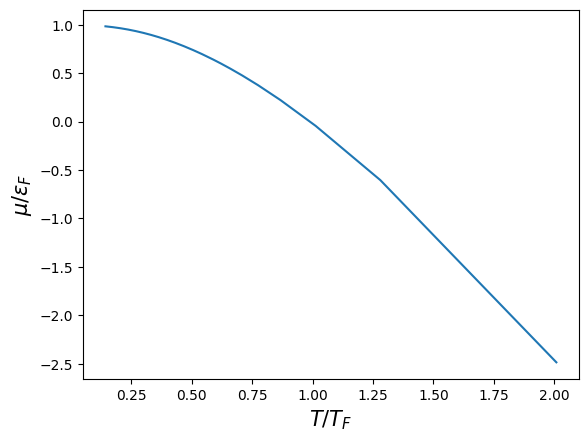

In [19]:
z_set = np.linspace(0.29,1000,3000) # Discretizo la fugacidad, el rango se eligió de forma que la temperatura estuviera entre 0 y 2T_F

T_aux = [T(z)/T_F for z in z_set] # Asocio a cada fugacidad una temperatura

mu = [k_B * T(z) * np.log(z) * (1/e_F) for z in z_set] # Asocio a cada valor de temperatura un potencial químico

plt.figure()

plt.plot(T_aux, mu)

plt.xlabel(r"$T/T_F$", fontsize=15)
plt.ylabel(r"$\mu / \epsilon_F$", fontsize=15)

plt.show()

## (f) Calcule la presión P en el rango $0 ≤ T ≤ 2T_F$. Muestre sus resultados en una gráfica de $\frac{P}{P_F}$ vs $\frac{T}{T_F}$ 

$$
\frac{P}{k_BT} = \frac{\gamma}{\lambda^3}f_{5/2}(z) \hspace{1cm} \Rightarrow \hspace{1cm} P = \left(\frac{2\pi \hbar^2}{mk_BT}\right)^{-\frac{3}{2}}  \gamma k_BT f_{5/2}(z)
$$

/tmp/ipykernel_407486/216657593.py:3: RuntimeWarning: overflow encountered in exp
  return np.power(x, nu-1) / ((1/z)*np.exp(x) + 1)


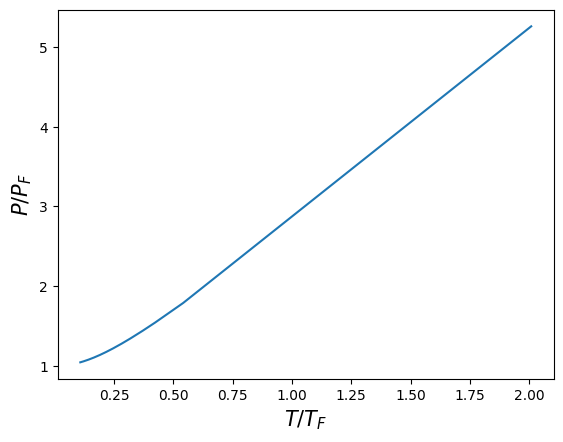

In [40]:
z_set = np.linspace(0.29,10000,3000) # Discretizo la fugacidad, el rango se eligió de forma que la temperatura estuviera entre 0 y 2T_F

T_aux = [T(z)/T_F for z in z_set] # Asocio a cada fugacidad una temperatura

P_aux = [(1/P_F)*np.power((2*np.pi*h**2) / (m*k_B*T(z)), -3/2) * (gamma * k_B * T(z)) * f(5/2, z) for z in z_set] # Asocio a cada valor de temperatura una presión

plt.figure()

plt.plot(T_aux, P_aux)

plt.xlabel(r"$T/T_F$", fontsize=15)
plt.ylabel(r"$P / P_F$", fontsize=15)

plt.show()